# Homework 6

In [1]:
# imports
import numpy as np
from importlib import reload

from oceanpy import constants
import unyt
from oceanpy.forces import coriolis as ofc

from bokeh import plotting
from bokeh import models

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
def set_fontsize(p, fsz):
    '''
    Parameters
    ----------
    ax : Bokeh plot class
    fsz : float
      Font size
    '''
    p.xaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.xaxis.major_label_text_font_size = "{:d}pt".format(fsz)
    #
    p.yaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.yaxis.major_label_text_font_size = "{:d}pt".format(fsz)

# 1. Reading

## a) Sea surface height of idealized gyre

### i) Uniformly rotating 

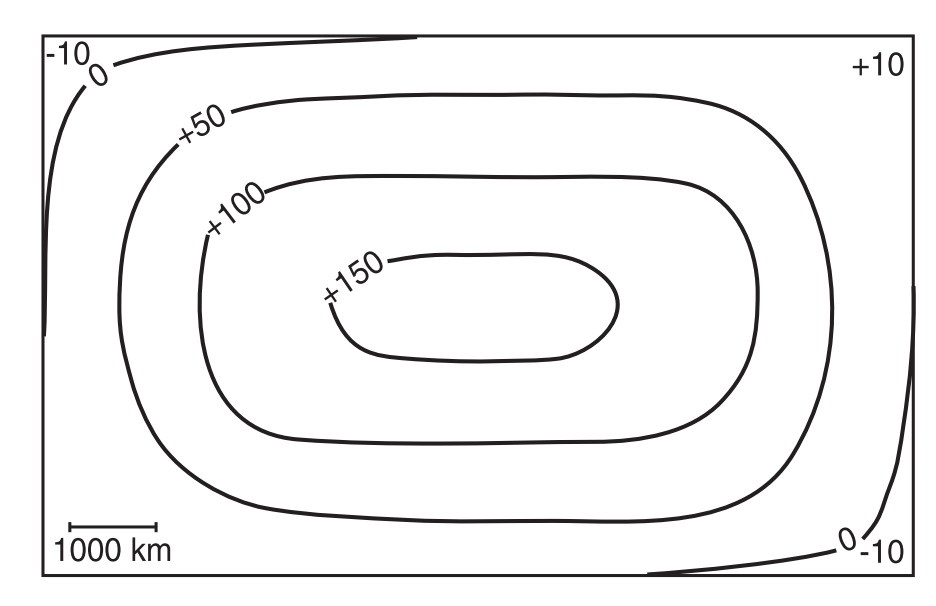

In [3]:
# Talley Fig S7.33a
Image(filename = './uniformly.png', width=500)#, height=100)

### ii) non-uniform rotation

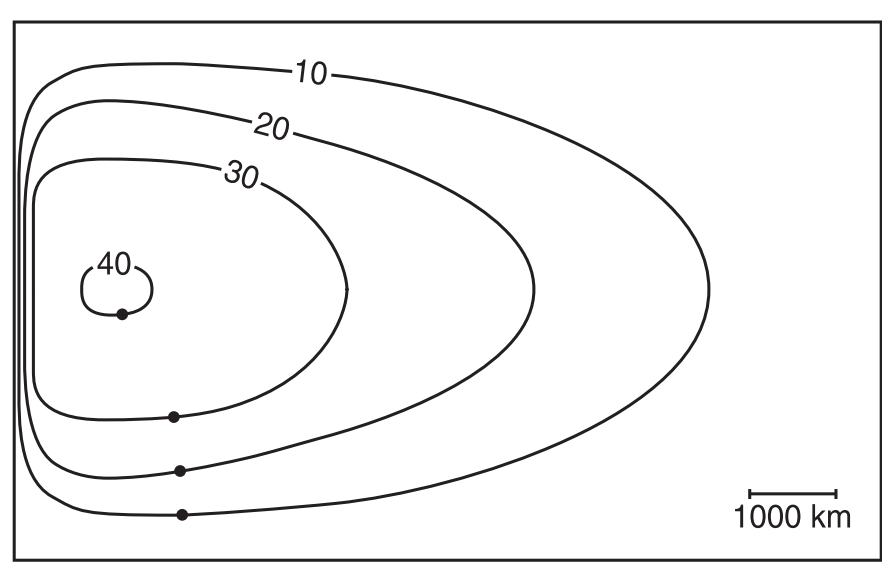

In [4]:
# Talley Fig S7.33b
Image(filename = './beta.png', width=500)#, height=100)

## b) The effect is a squashing of the contours.  This leads to an intensification on the Western boundary.

## c) Two western boundary currents are the Gulf Stream and Kuroshio

----

# 2. Strommel gyre

## a) $\zeta$ term in the ocean interior

In [8]:
H = 300 * unyt.m
beta = 2e-11 / unyt.m / unyt.s
r = 5e-4 *unyt.m/unyt.s

### At the * (interior), the figures indicate:

In [20]:
v_i = -0.013 * unyt.m/unyt.s
u_i = 0. * unyt.m/unyt.s

In [26]:
# And estimate the derivatives:
dv_dx_i = 0. / unyt.s
du_dy_i = (0.01*unyt.m/unyt.s) / (1500*unyt.km)

In [27]:
# Estimate zeta
zeta_i = dv_dx_i - du_dy_i
zeta_i

unyt_quantity(-6.66666667e-09, '1/s')

### Calculate $\beta V$

In [21]:
beta_V_i = beta * v_i * H
beta_V_i

unyt_quantity(-7.8e-11, 'm/s**2')

### Comparing

In [36]:
zeta_r_i = -zeta_i * r
zeta_r_i, beta_V_i/zeta_r_i

(unyt_quantity(3.33333333e-12, 'm/s**2'),
 unyt_quantity(-23.4, '(dimensionless)'))

### We find that $\zeta r$ in the interior is $\approx 20\times$ smaller than $\beta V$

### Near the Western boundary current, we have:

In [31]:
# Estimate the derivatives:
dv_dx_w = -(0.2 *unyt.m/ unyt.s) / (60*unyt.km)
du_dy_w = (0.02*unyt.m/unyt.s) / (1500*unyt.km)

In [33]:
# Estimate zeta
zeta_w = dv_dx_w - du_dy_w
zeta_w

unyt_quantity(-3.34666667e-06, '1/s')

In [37]:
# -r zeta
zeta_r_w = - zeta_w * r
zeta_r_w

unyt_quantity(1.67333333e-09, 'm/s**2')

In [34]:
v_w = 0.35 * unyt.m/unyt.s
u_w = 0. * unyt.m/unyt.s

In [35]:
beta_V_w = beta * v_w * H
beta_V_w

unyt_quantity(2.1e-09, 'm/s**2')

### $-r \zeta$ and $\beta V$ have the same sign (positive) and nearly the same magnitude.

----

# 3. East-West flipped

## a) Estimate $\zeta$ in the eastern boundary current

In [38]:
# Estimate the derivatives:
dv_dx_e = -(0.2 *unyt.m/ unyt.s) / (60*unyt.km)
du_dy_e = (0.02*unyt.m/unyt.s) / (1500*unyt.km)

In [39]:
# Estimate zeta
zeta_e = dv_dx_e - du_dy_e
zeta_e

unyt_quantity(-3.34666667e-06, '1/s')

### The sign is negative, consistent with the right-hand rule.

## b) Compare with $\beta V$

In [40]:
v_e = -0.35 * unyt.m/unyt.s

In [41]:
beta_V_e = beta * v_e * H
beta_V_e

unyt_quantity(-2.1e-09, 'm/s**2')

In [42]:
zeta_r_e = -r * zeta_e
zeta_r_e

unyt_quantity(1.67333333e-09, 'm/s**2')

### These have opposite signs!  i.e. there is no chance.

----

# 4. Southern gyre

## Equations of geostrophic balance:

## $-f v = - \frac{1}{\rho_0} \frac{\partial p}{dx}$

## $f u = - \frac{1}{\rho_0} \frac{\partial p}{dy}$

## a) Redraw

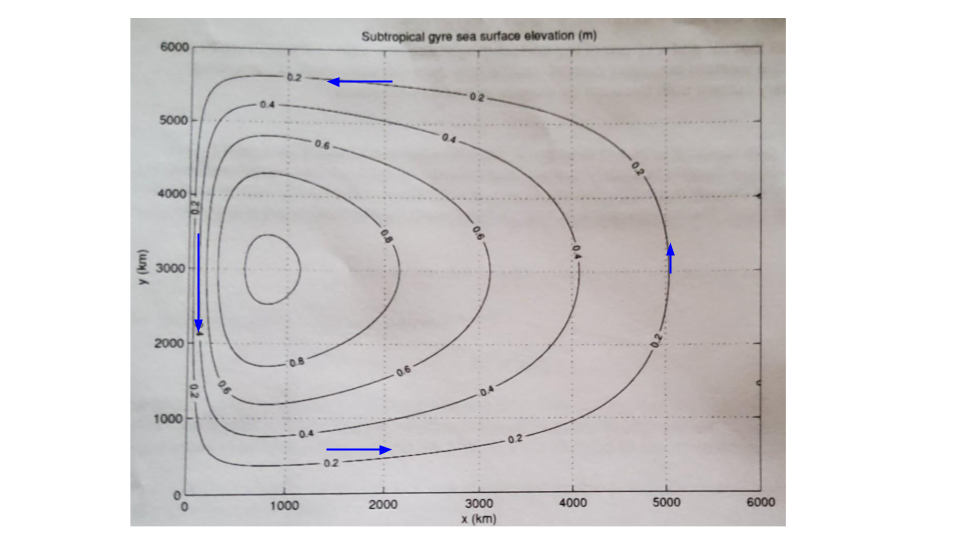

In [44]:
# Talley Fig 3.5
Image(filename = './subtropical_gyre.png', width=900)#, height=100)

## b) Height profile

In [48]:
x = [100., 300., 1000., 2000., 3000., 4000., 5000.]
eta = [0.2, 0.4, 1.0, 0.85, 0.63, 0.4, 0.2]

In [49]:
# Plot
plotting.output_notebook()

p = plotting.figure(title='Height with x', x_axis_label='x [km]',
                   y_axis_label='height [m]')#, x_range=(0,-90))

p.line(x, eta, legend='eta', line_width=2)

p.legend.location = "top_right"

set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

## c) Estimate velocity

### At $x \approx 500$km

#### First, $u=0$ m/s because $\partial p / \partial y \approx 0$

#### Estimate $v$

In [60]:
f = -1e-4 / unyt.s
g = 9.8 * unyt.m / unyt.s**2

In [61]:
delta_eta = 0.1 * unyt.m
delta_x = 300 * unyt.km
dp_dx_rho = (g * delta_eta) / delta_x
dp_dx_rho

unyt_quantity(3.26666667e-06, 'm/s**2')

In [62]:
v = dp_dx_rho / f
v.to('m/s')

unyt_quantity(-0.03266667, 'm/s')